In [1]:
import numpy as np
import pandas as pd

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Dataset
from sklearn.datasets import load_breast_cancer

# Model evaluation
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV
)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print("Dataset Shape:", df.shape)
print("\nTarget Distribution:")
print(df['target'].value_counts())


Dataset Shape: (569, 31)

Target Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1-Score: 0.9655172413793104


In [6]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf_kfold_scores = cross_val_score(
    rf, X, y, cv=kfold, scoring='accuracy'
)

print("K-Fold CV Scores:", rf_kfold_scores)
print("Mean Accuracy:", rf_kfold_scores.mean())


K-Fold CV Scores: [0.95614035 0.96491228 0.93859649 0.96491228 0.96460177]
Mean Accuracy: 0.9578326346840551


In [7]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_skfold_scores = cross_val_score(
    rf, X, y, cv=skfold, scoring='accuracy'
)

print("Stratified K-Fold CV Scores:", rf_skfold_scores)
print("Mean Accuracy:", rf_skfold_scores.mean())


Stratified K-Fold CV Scores: [0.96491228 0.93859649 0.95614035 0.94736842 0.97345133]
Mean Accuracy: 0.9560937742586555


In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [9]:
best_rf = grid_rf.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("Optimized RF Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-Score:", f1_score(y_test, y_pred_best))


Optimized RF Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1-Score: 0.9655172413793104


In [10]:
models = {
    "Random Forest": RandomForestClassifier(**grid_rf.best_params_, random_state=42),
    "SVM": SVC(kernel='rbf', gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

comparison_results = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skfold, scoring='accuracy')
    comparison_results.append({
        "Model": name,
        "Mean CV Accuracy": scores.mean()
    })

comparison_df = pd.DataFrame(comparison_results)
comparison_df


,Model,Mean CV Accuracy
0,Random Forest,0.954324
1,SVM,0.913895
2,Decision Tree,0.910402


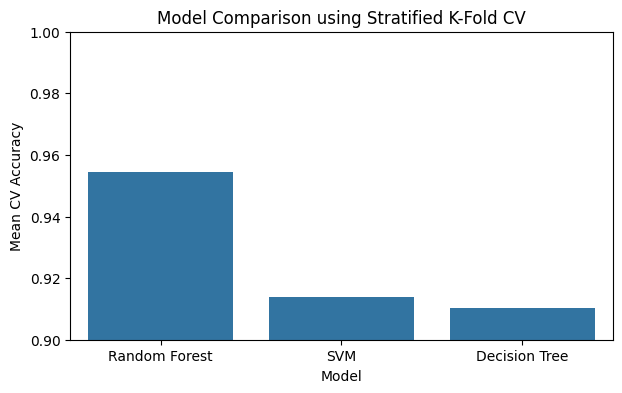

In [11]:
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Mean CV Accuracy", data=comparison_df)
plt.title("Model Comparison using Stratified K-Fold CV")
plt.ylim(0.9, 1.0)
plt.show()


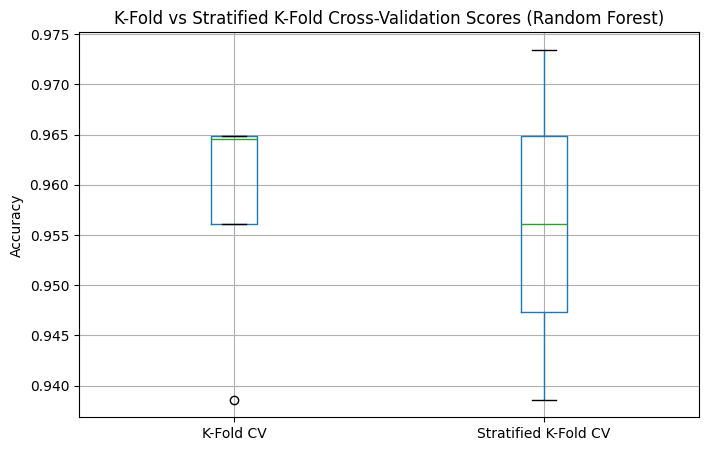

In [12]:
cv_df = pd.DataFrame({
    "K-Fold CV": rf_kfold_scores,
    "Stratified K-Fold CV": rf_skfold_scores
})

plt.figure(figsize=(8,5))
cv_df.boxplot()
plt.title("K-Fold vs Stratified K-Fold Cross-Validation Scores (Random Forest)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


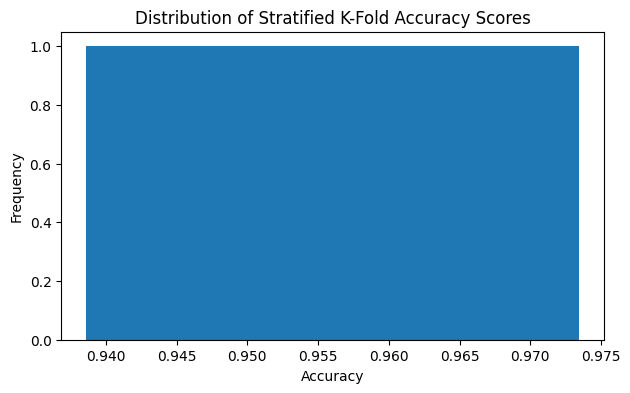

In [13]:
plt.figure(figsize=(7,4))
plt.hist(rf_skfold_scores, bins=5)
plt.title("Distribution of Stratified K-Fold Accuracy Scores")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()


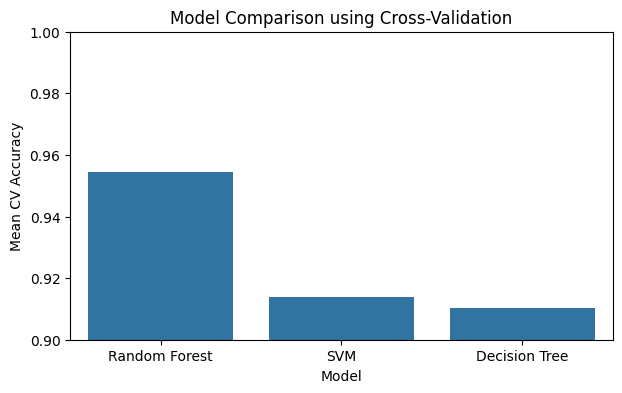

In [14]:
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Mean CV Accuracy", data=comparison_df)
plt.title("Model Comparison using Cross-Validation")
plt.ylim(0.9, 1.0)
plt.show()


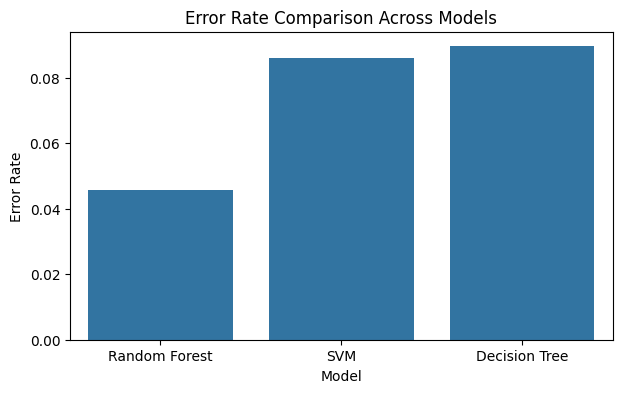

In [15]:
comparison_df["Error Rate"] = 1 - comparison_df["Mean CV Accuracy"]

plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Error Rate", data=comparison_df)
plt.title("Error Rate Comparison Across Models")
plt.show()


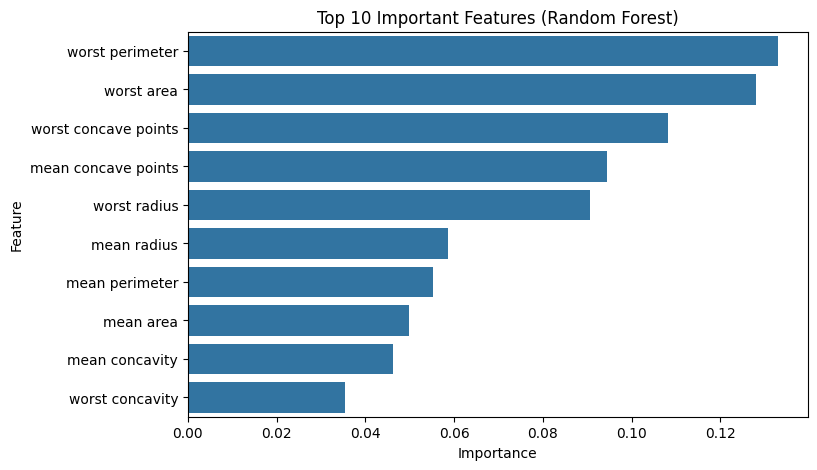

In [16]:
importances = best_rf.feature_importances_
feature_names = data.feature_names

feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


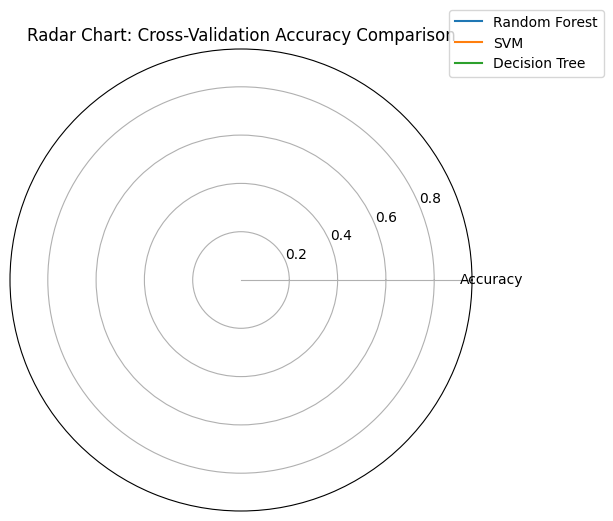

In [17]:
labels = ["Accuracy"]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6,6))

for _, row in comparison_df.iterrows():
    values = [row["Mean CV Accuracy"]]
    values += values
    plt.polar(angles, values, label=row["Model"])

plt.xticks(angles[:-1], labels)
plt.title("Radar Chart: Cross-Validation Accuracy Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
